## ECE219 Project 1

In [1]:
# Import packages 
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import random
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # supress warning

# Define utility functions
#define confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,title,cmap=plt.cm.Blues, normalize=False):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(16,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes)
    plt.xticks(np.arange(cm.shape[1]),fontsize=18)
    plt.yticks(np.arange(cm.shape[0]),fontsize=18)
    ax.set_title(title,fontweight="bold", size=18) # Title
    ax.set_ylabel('True label', fontsize = 18) # Y label
    ax.set_xlabel('Predicted label', fontsize = 18) # X label

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#### Question 1: Hostogram

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
print("Number of documents in Training set:",len(newsgroups_train.data))
print("Number of target in Training set:",len(newsgroups_train.target))

Number of documents in Training set: 11314
Number of target in Training set: 11314


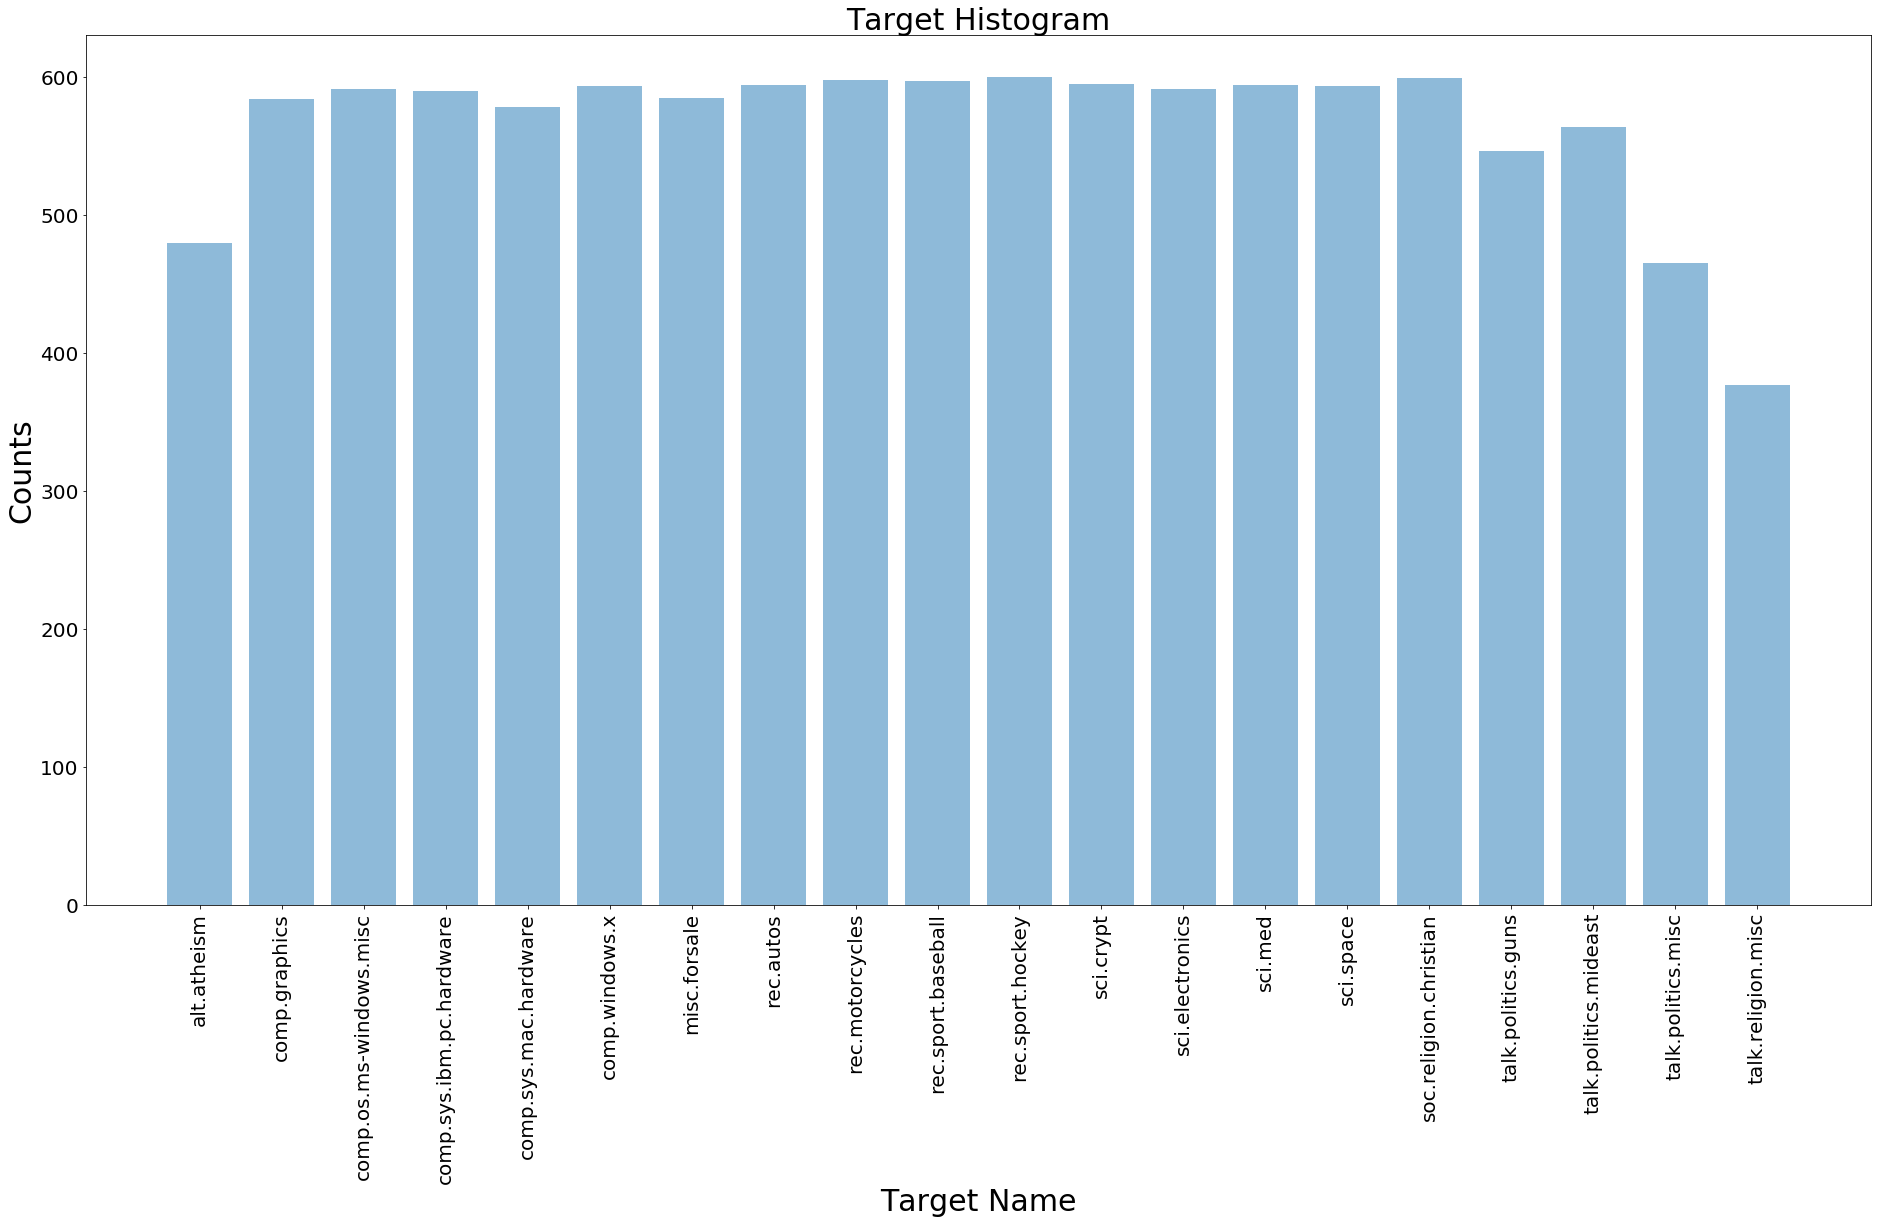

In [3]:
# Plot the histogram of the target category in Training set
#count number and id
num_target = {}
for num in newsgroups_train.target:
    if num not in num_target:
        num_target[num] = 1
    else:
        num_target[num] += 1
#match target name and counts
name_target = {}
for i in range(len(newsgroups_train.target_names)):
    name_target[newsgroups_train.target_names[i]] = num_target[i]

objects = list(name_target.keys())
x = np.arange(len(objects))
counts = name_target.values()
plt.figure(figsize=(32,16))
plt.xticks(x, objects,rotation = 90,fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x, counts, align='center', alpha=0.5)
plt.xlabel('Target Name',fontsize=30)
plt.ylabel('Counts',fontsize=30)
plt.title('Target Histogram',fontsize=30)
plt.show()

### Binary Classification
#### 1 Feature Extraction
#### Question 2: TF-IDF

In [4]:
computer_technology = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = computer_technology + recreational_activity, shuffle = True, random_state = 42, remove=('headers', 'footers', 'quotes'))
test_dataset = fetch_20newsgroups(subset = 'test', categories = computer_technology + recreational_activity, shuffle = True, random_state = 42, remove=('headers', 'footers', 'quotes'))

#Lemmaitzer
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

##tokenizer
def tokenizer(text):
    wnl = WordNetLemmatizer()
    clean_text = re.sub(r'[^A-Za-z]', " ", text)
    tokenized_text = nltk.word_tokenize(clean_text) 
    lemaitzed_text = [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(tokenized_text)]
    return lemaitzed_text   
    
##tokenizer & vectorize
vectorizer = CountVectorizer(min_df=3, tokenizer=tokenizer, lowercase=True, stop_words='english')
X_train_counts = vectorizer.fit_transform(train_dataset.data)
X_test_counts = vectorizer.transform(test_dataset.data)

##tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [5]:
print("The shape of TF-IDF matrix of training set:",X_train_tfidf.shape)
print("The shape of TF-IDF matrix of testing set:",X_test_tfidf.shape)

The shape of TF-IDF matrix of training set: (4732, 9429)
The shape of TF-IDF matrix of testing set: (3150, 9429)


#### 2. Dimensionality Reduction

#### Question 3: LSI and NMF

In [6]:
#LSI
svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)
print("The shape of reduced X_train through LSI:",X_train_reduced.shape)
print("The shape of reduced X_test through LSI:",X_test_reduced.shape)

The shape of reduced X_train through LSI: (4732, 50)
The shape of reduced X_test through LSI: (3150, 50)


In [7]:
#NMF
model = NMF(n_components=50, init='random', random_state=0)
W_train = model.fit_transform(X_train_tfidf)
H = model.components_
W_test = model.transform(X_test_tfidf)
print("The shape of reduced X_train through NMF:",W_train.shape)
print("The shape of reduced X_test through NMF:",W_test.shape)

The shape of reduced X_train through NMF: (4732, 50)
The shape of reduced X_test through NMF: (3150, 50)


In [8]:
# Compute squared residual 
print("Squared residual of NMF is:", np.sum(np.array(X_train_tfidf-W_train.dot(H))**2))
print("Squared residual of LSI is:", np.sum(np.array(X_train_tfidf-X_train_reduced.dot(svd.components_))**2))

Squared residual of NMF is: 3964.7253596155
Squared residual of LSI is: 3922.261712074704


#### 3 Classification Algorithm

#### Question4: Hard margin and soft margin SVM

In [9]:
#Data preprocessing
# combine original categories into two
computer_technology = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
comp_train = fetch_20newsgroups(subset='train', categories=computer_technology, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_train = fetch_20newsgroups(subset='train', categories=recreational_activity, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_test = fetch_20newsgroups(subset='test', categories=computer_technology, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_test = fetch_20newsgroups(subset='test', categories=recreational_activity, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# map to binary classification
all_train = comp_train.data+rec_train.data
all_test = comp_test.data+rec_test.data
target_train = [True] * len(comp_train.data) + [False] * len(rec_train.data)
target_test = [True] * len(comp_test.data) + [False] * len(rec_test.data)

#Lemmaitzer
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

##tokenizer
def tokenizer(text):
    wnl = WordNetLemmatizer()
    clean_text = re.sub(r'[^A-Za-z]', " ", text)
    tokenized_text = nltk.word_tokenize(clean_text) 
    lemaitzed_text = [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(tokenized_text)]
    return lemaitzed_text

##tokenizer & vectorize
vectorizer = CountVectorizer(min_df=3, tokenizer=tokenizer, lowercase=True, stop_words='english')
X_train_counts = vectorizer.fit_transform(all_train)
X_test_counts = vectorizer.transform(all_test)

##tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print("The shape of TF-IDF matrix of training set:",X_train_tfidf.shape)
print("The shape of TF-IDF matrix of testing set:",X_test_tfidf.shape)

#LSI
svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)
print("The shape of reduced X_train through LSI:",X_train_reduced.shape)
print("The shape of reduced X_test through LSI:",X_test_reduced.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


The shape of TF-IDF matrix of training set: (4732, 9429)
The shape of TF-IDF matrix of testing set: (3150, 9429)
The shape of reduced X_train through LSI: (4732, 50)
The shape of reduced X_test through LSI: (3150, 50)


-------------------- Hard-SVM --------------------
accuracy: 0.5104761904761905
precision: 0.875
recall: 0.013461538461538462
F-1 score: 0.026515151515151516
confusion matrix: [[1587    3]
 [1539   21]]


<Figure size 432x288 with 0 Axes>

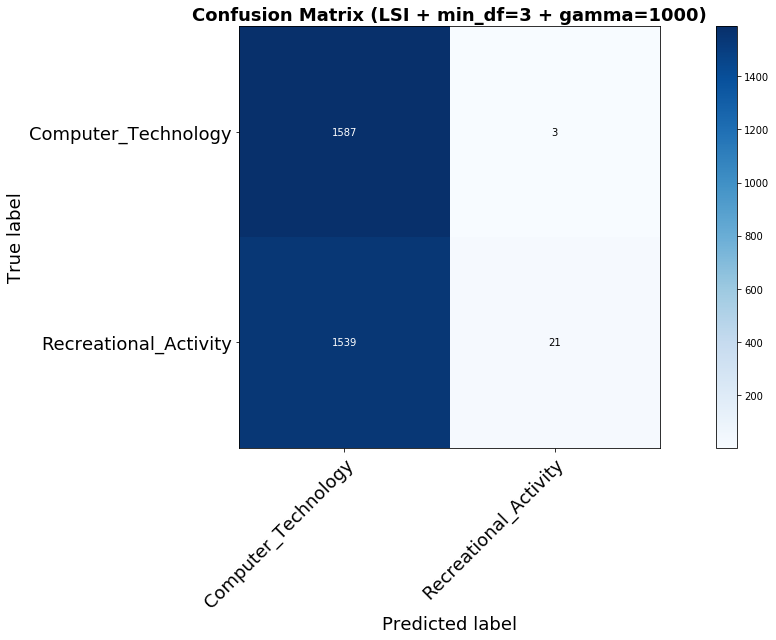

In [10]:
#training SVM
#ROC
fprs = []#collect false positive
tprs = []#collect true positive

#Hard SVM r=1000
clf = svm.SVC(probability=True,gamma=1000)
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
#Calculate the probability estimates of the positive class
prob_data = clf.predict_proba(X_test_reduced)
prob_data = prob_data[:,1]
#Calculate fpr & ftr 
fpr,tpr,thresholds=metrics.roc_curve(target_test, prob_data)
fprs.append(fpr)
tprs.append(tpr)
print("-"*20+ " Hard-SVM "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))
conf_mat = metrics.confusion_matrix(target_test, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (LSI + min_df=3 + gamma=1000)'
class_names = np.array(['Computer_Technology', 'Recreational_Activity'])
plot_confusion_matrix(target_test, Y_predict ,classes=class_names,title=title)
plt.show()

-------------------- Hard-SVM --------------------
accuracy: 0.5047619047619047
precision: 0.0
recall: 0.0
F-1 score: 0.0
confusion matrix: [[1590    0]
 [1560    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

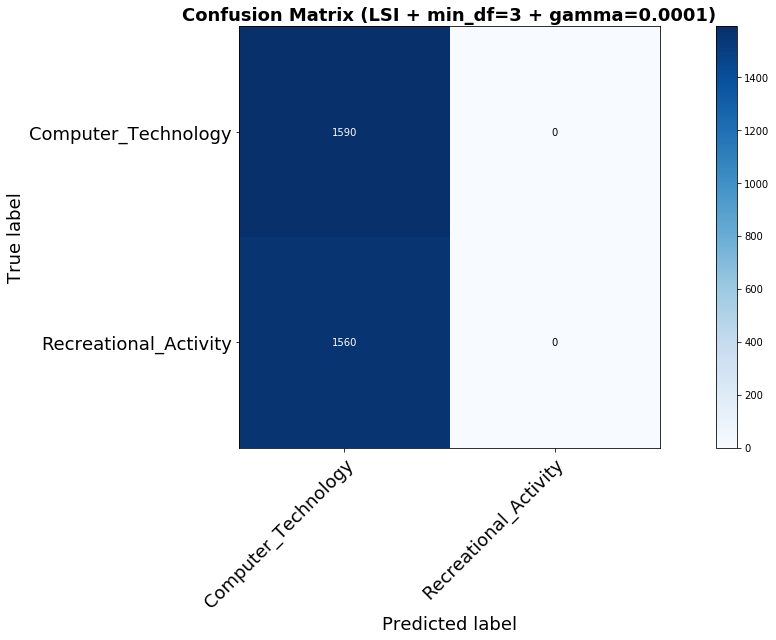

In [11]:
#Soft SVM r=0.0001
clf = svm.SVC(probability=True,gamma=0.0001)
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
#Calculate the probability estimates of the positive class
prob_data = clf.predict_proba(X_test_reduced)
prob_data = prob_data[:,1]
#Calculate fpr & ftr 
fpr,tpr,thresholds=metrics.roc_curve(target_test, prob_data)
fprs.append(fpr)
tprs.append(tpr)
print("-"*20+ " Hard-SVM "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))
conf_mat = metrics.confusion_matrix(target_test, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (LSI + min_df=3 + gamma=0.0001)'
class_names = np.array(['Computer_Technology', 'Recreational_Activity'])
plot_confusion_matrix(target_test, Y_predict ,classes=class_names,title=title)
plt.show()

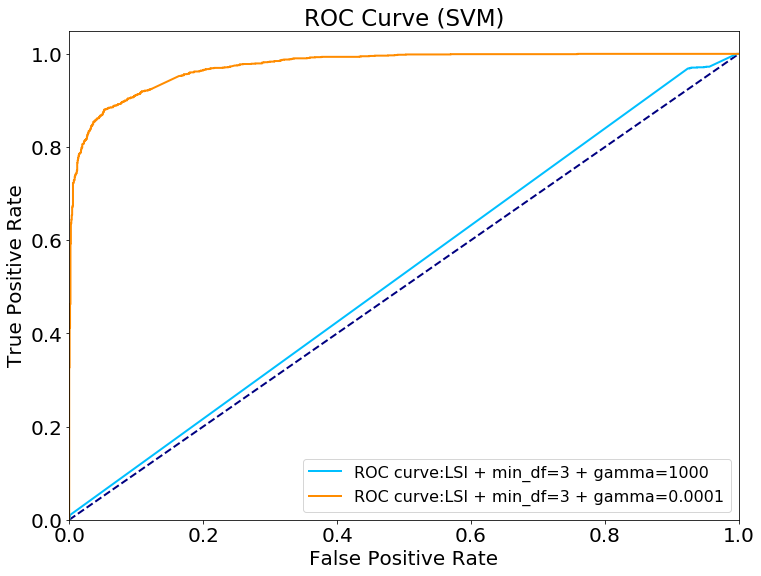

In [12]:
# plot ROC curve
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ROC Curve (SVM)', fontsize=23)
color = ['deepskyblue', 'darkorange']
r = [1000, 0.0001]
for i in range(2):
    plt.plot(fprs[i], tprs[i], color=color[i], lw=2, label='ROC curve:LSI + min_df=3 + gamma='+str(r[i]))
plt.legend(loc="lower right",fontsize=16)
plt.show()

In [13]:
#cross validation to select best r
r = [0.001,0.01,0.1,1,10,100,1000]
average_score = []
for gamma in r:
    clf = svm.SVC(gamma=gamma)
    scores = cross_val_score(clf, X_train_reduced, target_train, cv=5)
    average_score.append(scores.mean())
best_r = r[np.argmax(average_score)]
print('Best gamma is:',best_r)

Best gamma is: 1


-------------------- Best-SVM --------------------
accuracy: 0.9250793650793651
precision: 0.9715099715099715
recall: 0.8743589743589744
F-1 score: 0.9203778677462888
confusion matrix: [[1550   40]
 [ 196 1364]]


<Figure size 432x288 with 0 Axes>

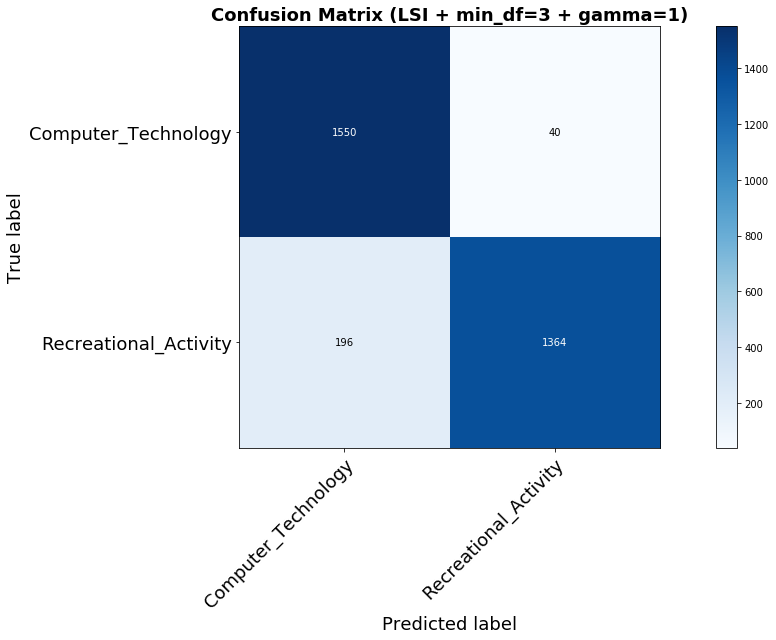

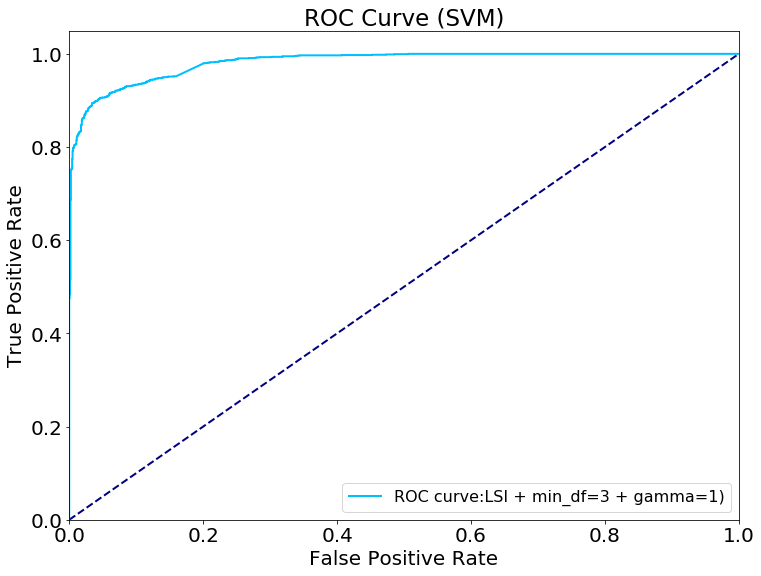

In [14]:
#Best SVM
clf = svm.SVC(probability=True,gamma=best_r)
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
#Calculate the probability estimates of the positive class
prob_data = clf.predict_proba(X_test_reduced)
prob_data = prob_data[:,1]
#Calculate fpr & ftr 
fpr,tpr,thresholds=metrics.roc_curve(target_test, prob_data)
print("-"*20+ " Best-SVM "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))
conf_mat = metrics.confusion_matrix(target_test, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (LSI + min_df=3 + gamma=' + str(best_r) + ')'
class_names = np.array(['Computer_Technology', 'Recreational_Activity'])
plot_confusion_matrix(target_test, Y_predict ,classes=class_names,title=title)
plt.show()

# plot ROC curve
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ROC Curve (SVM)', fontsize=23)
color = 'deepskyblue'
r = [1000, 0.0001]
plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve:LSI + min_df=3 + gamma='+str(best_r)+')')
plt.legend(loc="lower right",fontsize=16)
plt.show()

#### Question 5: Logistic Regression

-------------------- Logistic Regression without regularization --------------------
accuracy: 0.5768253968253968
precision: 1.0
recall: 0.14551282051282052
F-1 score: 0.25405707890318974
confusion matrix: [[1590    0]
 [1333  227]]


<Figure size 432x288 with 0 Axes>

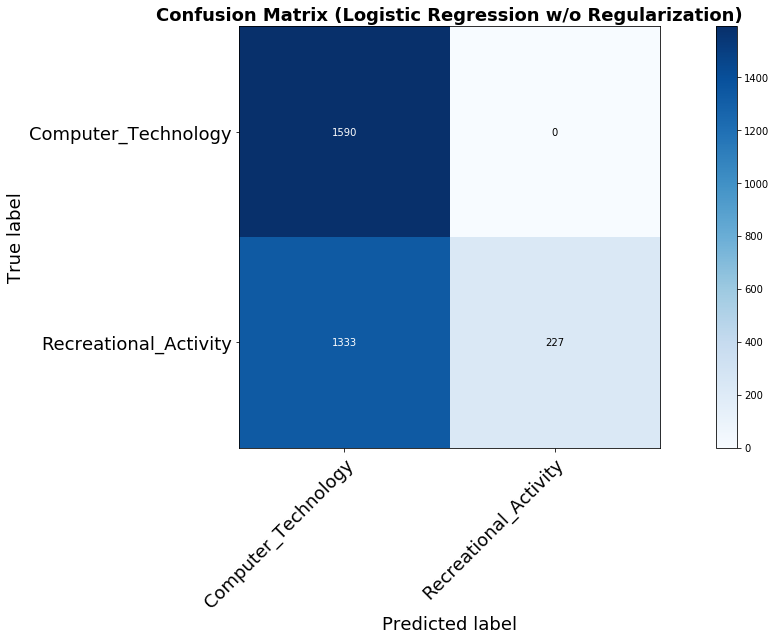

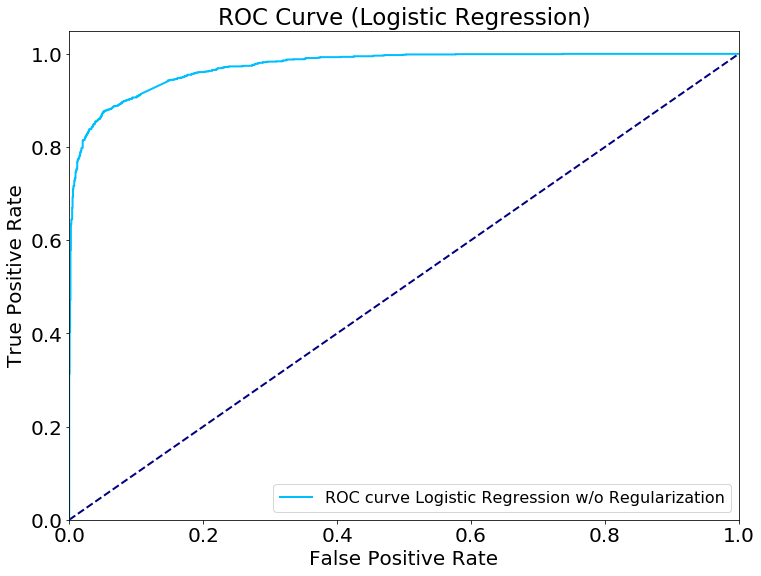

In [15]:
#ROC
fprs = []#collect false positive
tprs = []#collect true positive

#Logistic Regression without Regularization
clf = LogisticRegression(C=1e-10) #remove regularization
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
#Calculate fpr & ftr 
fpr, tpr, thresholds = metrics.roc_curve(target_test, clf.predict_proba(X_test_reduced)[:, 1])
fprs.append(fpr)
tprs.append(tpr)
print("-"*20+ " Logistic Regression without regularization "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))
conf_mat = metrics.confusion_matrix(target_test, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (Logistic Regression w/o Regularization)'
class_names = np.array(['Computer_Technology', 'Recreational_Activity'])
plot_confusion_matrix(target_test, Y_predict ,classes=class_names,title=title)
plt.show()

# plot ROC curve
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ROC Curve (Logistic Regression)', fontsize=23)
color = 'deepskyblue'
r = [1000, 0.0001]
plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve Logistic Regression w/o Regularization')
plt.legend(loc="lower right",fontsize=16)
plt.show()

In [16]:
#CV to find best L1 regularization
c = [0.001,0.01,0.1,1,10,100,1000]
average_score = []
for C in c:
    clf = LogisticRegression(penalty='l1',C=C)
    scores = cross_val_score(clf, X_train_reduced, target_train, cv=5)
    average_score.append(scores.mean())
best_C_l1 = c[np.argmax(average_score)]
print('Best regularization of L1 is:',best_C_l1)

Best regularization of L1 is: 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

In [17]:
#CV to find best L2 regularization
c = [0.001,0.01,0.1,1,10,100,1000]
average_score = []
for C in c:
    clf = LogisticRegression(penalty='l2',C=C)
    scores = cross_val_score(clf, X_train_reduced, target_train, cv=5)
    average_score.append(scores.mean())
best_C_l2 = c[np.argmax(average_score)]
print('Best regularization of L2 is:',best_C_l2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best regularization of L2 is: 100


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [18]:
#comparision of Logistic Regression
#Logistic Regression without Regularization
clf = LogisticRegression(C=1e-10) #remove regularization
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
print("-"*20+ " Logistic Regression without regularization "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))

#Logistic Regression with Best L1
clf = LogisticRegression(penalty='l1',C=10) # Best L1 Regularization
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
print("-"*20+ " Logistic Regression with Best L1 "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))

#Logistic Regression with Best L2
clf = LogisticRegression(penalty='l2',C=100) # Best L2 Regularization
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
print("-"*20+ " Logistic Regression with Best L2 "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))

-------------------- Logistic Regression without regularization --------------------
accuracy: 0.5768253968253968
precision: 1.0
recall: 0.14551282051282052
F-1 score: 0.25405707890318974


ValueError: ignored

#### Question 6: Naive Bayes

In [0]:
clf = GaussianNB() #remove regularization
clf.fit(X_train_reduced, target_train)
Y_predict = clf.predict(X_test_reduced)
#Calculate fpr & ftr 
fpr, tpr, thresholds = metrics.roc_curve(target_test, clf.predict_proba(X_test_reduced)[:, 1])
fprs.append(fpr)
tprs.append(tpr)
print("-"*20+ " Naive Bayes "+"-"*20)
print("accuracy:",metrics.accuracy_score(target_test, Y_predict))
print("precision:",metrics.precision_score(target_test, Y_predict))
print("recall:",metrics.recall_score(target_test, Y_predict))
print("F-1 score:",f1_score(target_test, Y_predict))
conf_mat = metrics.confusion_matrix(target_test, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (Naive Bayes)'
class_names = np.array(['Computer_Technology', 'Recreational_Activity'])
plot_confusion_matrix(target_test, Y_predict ,classes=class_names,title=title)
plt.show()

# plot ROC curve
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('ROC Curve (Naive Bayes)', fontsize=23)
color = 'deepskyblue'
r = [1000, 0.0001]
plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve Naive Bayes')
plt.legend(loc="lower right",fontsize=16)
plt.show()

#### Question 8: Multiclass Classification

In [0]:
#target category
categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
#data
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

In [0]:
##tokenizer & vectorize
vectorizer = CountVectorizer(min_df=3, tokenizer=tokenizer, lowercase=True, stop_words='english')
X_train_counts = vectorizer.fit_transform(train.data)
X_test_counts = vectorizer.transform(test.data)

##tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print("The shape of TF-IDF matrix of training set:",X_train_tfidf.shape)
print("The shape of TF-IDF matrix of testing set:",X_test_tfidf.shape)


#LSI
svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)
print("The shape of reduced X_train through LSI:",X_train_reduced.shape)
print("The shape of reduced X_test through LSI:",X_test_reduced.shape)


In [0]:
# Multiclass Naive Bayesian
multiclass_NB = GaussianNB()
multiclass_NB.fit(X_train_reduced, train.target)
Y_predict = multiclass_NB.predict(X_test_reduced)
print("-"*20+ " Multiclass Naive Bayes "+"-"*20)
print("accuracy:",metrics.accuracy_score(test.target, Y_predict))
print("precision:",metrics.precision_score(test.target, Y_predict,average='macro'))
print("recall:",metrics.recall_score(test.target, Y_predict,average='macro'))
print("F-1 score:",f1_score(test.target, Y_predict,average='macro'))

conf_mat = metrics.confusion_matrix(test.target, Y_predict)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (Naive Bayes)'
class_names = np.array(categories)
plot_confusion_matrix(test.target, Y_predict ,classes=class_names,title=title)
plt.show()

In [0]:
#one vs one
multiclass_svm_OvO = OneVsOneClassifier(svm.SVC(random_state=42))
multiclass_svm_OvO.fit(X_train_reduced, train.target)
multiclass_svm_OvO_pred = multiclass_svm_OvO.predict((X_test_reduced)) 

print("-"*20+ " Multiclass SVM One vs One "+"-"*20)
print("accuracy:",metrics.accuracy_score(test.target, multiclass_svm_OvO_pred))
print("precision:",metrics.precision_score(test.target, multiclass_svm_OvO_pred,average='macro'))
print("recall:",metrics.recall_score(test.target, multiclass_svm_OvO_pred,average='macro'))
print("F-1 score:",f1_score(test.target, multiclass_svm_OvO_pred,average='macro'))

conf_mat = metrics.confusion_matrix(test.target, multiclass_svm_OvO_pred)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (SVM One vs One)'
class_names = np.array(categories)
plot_confusion_matrix(test.target, multiclass_svm_OvO_pred ,classes=class_names,title=title)
plt.show()



In [0]:
#one vs rest
multiclass_svm_OvR = OneVsRestClassifier(svm.SVC(random_state=42))
multiclass_svm_OvR.fit(X_train_reduced, train.target)
multiclass_svm_OvR_pred = multiclass_svm_OvR.predict((X_test_reduced))

print("-"*20+ " Multiclass SVM One vs Rest "+"-"*20)
print("accuracy:",metrics.accuracy_score(test.target, multiclass_svm_OvR_pred))
print("precision:",metrics.precision_score(test.target, multiclass_svm_OvR_pred,average='macro'))
print("recall:",metrics.recall_score(test.target, multiclass_svm_OvR_pred,average='macro'))
print("F-1 score:",f1_score(test.target, multiclass_svm_OvR_pred,average='macro'))

conf_mat = metrics.confusion_matrix(test.target, multiclass_svm_OvR_pred)
print("confusion matrix:",conf_mat)
plt.figure()
title = 'Confusion Matrix (SVM One vs Rest)'
class_names = np.array(categories)
plot_confusion_matrix(test.target, multiclass_svm_OvR_pred ,classes=class_names,title=title)
plt.show()